In [5]:
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["axes.labelsize"] = 25.
plt.rcParams["xtick.labelsize"] = 20.
plt.rcParams["ytick.labelsize"] = 20.
plt.rcParams["legend.fontsize"] = 18.

plt.rcParams["figure.figsize"] = [11., 8.]

# Feature Importance / interpretability

**Types of interpretability**

* Global
* Local
* Factors interactions

**How to measure/estimate**

* Humans
    * Experts
    * Stats
* Models
* Known hypophyses

**Interpretable models**

* Linear/Polinomial
* Trees
* kNN


**Obstacles**

* Distribution of factors and their composition
* 'Cannibalism'

z-score?

## Partial Dependance Plots (PDP)

* Average decision function with the fixed paramets
* $f_{pdp}(x_s) = E_{x_c} f(x_s, x_c)$

<img src='imgs/impt1.png'>

- [x] simple
- [x] easy to calculate
- [x] can account for interactions
- [ ] assumes independence
- [ ] doesn't know about distribution
- [ ] realisticly can be used on 1-2 features
- [ ] can hide heterogeneous relations

In [7]:
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

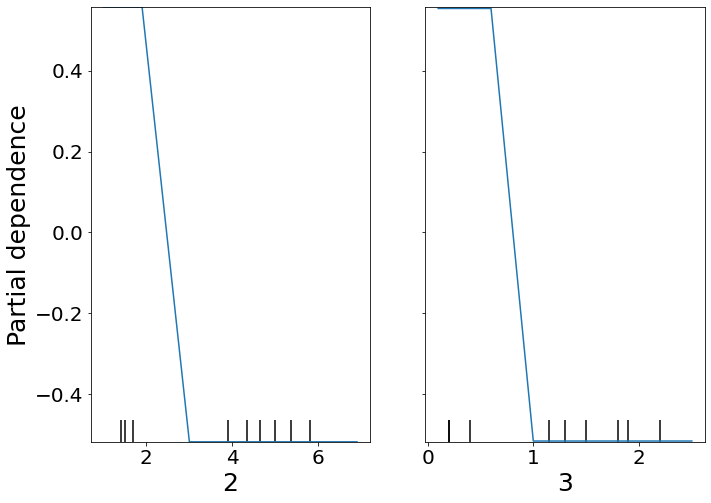

In [21]:
iris = load_iris()
mc_clf = GradientBoostingClassifier(n_estimators=10, max_depth=1).fit(iris.data, iris.target)
features = [2, 3]
PartialDependenceDisplay.from_estimator(mc_clf, iris.data, features, target=0)
plt.show()

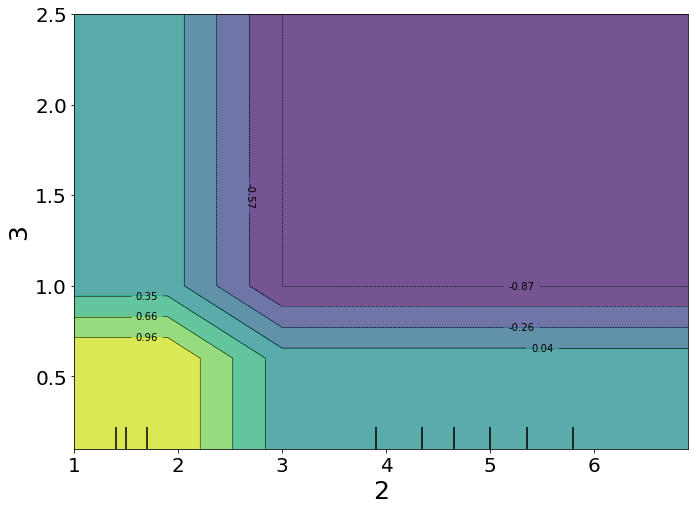

In [23]:
features = [(2, 3)]
PartialDependenceDisplay.from_estimator(mc_clf, iris.data, features, target=0)


# Individual Conditional Expectations (ICE)

* same as pdp but for each data point individualy

<img src='imgs/impt2.png'>

- [x] simple
- [x] easy to calculate
- [x] can show heterogeneous relations
- [ ] assumes independence
- [ ] only one feature
- [ ] small datasets
- [ ] no general rule (combine with PDP) 

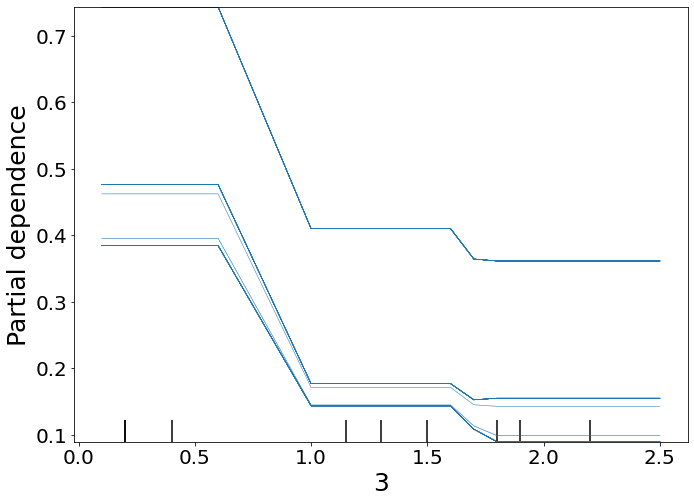

In [34]:
PartialDependenceDisplay.from_estimator(mc_clf, iris.data, [3], target=0, kind='individual')
plt.show()

# Accumulated Local Effects (ALE)

$$f_m(x_s) = E_{x_c|x_s} f(x_s, x_c)$$


$$f_{ale}(x_s) = \int (E_{x_c|z_s} \frac{\partial{f(z_s, x_c)}}{\partial z_s} - const) d z_s$$

<img src='imgs/impt3.png'>

- [x] accounts for correlation
- [x] faster than PDP
- [x] don't use fake points
- [ ] interpratable only localy 
- [ ] grid must be chosen
- [ ] no ICE variant
- [ ] can be noisy

https://github.com/blent-ai/ALEPython

https://docs.seldon.io/projects/alibi/en/stable/index.html

## Permutation Feature Importance

* fix all but one feature
* replace one feature with real values from the dataset
* calculate difference in target function

- [x] nice interpretation
- [x] one number to compare
- [ ] non real points
- [ ] can be biased
- [ ] dependent on the real ground truth

In [36]:
from sklearn.inspection import permutation_importance

## Local interpretable model-agnostic explanations (LIME)

* compare with some interpretabel model
* $explanation(x) = argmin_g (f, g, \rho) + R(g)$
* $\hat\beta_{x_0} = argmin \sum_{S(x_0, \varepsilon)} (f(x - \beta x)) + |\beta|^2$

- [x] work for any model
- [x] have error estimation 
- [x] can use over features than original model
- [ ] neighbourhood
- [ ] can be inconsitent
- [ ] can be biased on class of g

https://github.com/marcotcr/lime

## Shapley

<img src='imgs/impt4.png'>

<img src='imgs/impt5.png'>

<img src='imgs/impt6.png'>

- [x] solid theory
- [x] tells about interactions with a subsets
- [ ] hard to compute
- [ ] unrealistic data

https://github.com/slundberg/shap

## Greedy feature selection

* make few subsets
* train with two sets of features (on train)
* calculate some metrics (on validation)
* compare results
* add/remove a feature

# Boosting libraries

## CatBoost vs. LightGBM vs. XGBoost

<img src='imgs/tree1.png'>

### Symmetry

<img src='imgs/tree2.png'>

<img src='imgs/tree3.png'>

### Splitting

* Catboost 
    * node get feature+splits based on some features
    * choose best feature-split

* LightGBM
    * keep points with large gradients
    * subsample points with small gradients
    * chooses best split among retained points

* XGBoost
    * presorts all features
    * binirize values
    * choose best split over bins

### Boosting

* Classic boosting can overfit since estimates residuals on same data 
* Ordered boosting trains on one subset and estimates residuals on another


* Catboost
    * https://catboost.ai/en/docs/
    * https://github.com/catboost/catboost
* LightGBM
    * https://lightgbm.readthedocs.io/
    * https://github.com/microsoft/LightGBM
* XGBoost
    * https://xgboost.readthedocs.io/
    *  https://github.com/dmlc/xgboost